# Cálculo del camino mínimo con Algoritmos genéticos
En este ejercicio se desarrolla un algoritmo genético desde 0 para resolver el problema del cálculo del camino mínimo.

En este caso, contamos con un brazo mecánico en una cadena de montaje. Dicho brazo debe calcular la ruta más corta para pasar por todos los puntos de una placa, en la que realizará incisiones para incorporar componentes electrónicos.

Cada incisión tiene su componente en x y su componente en y, es decir, está compuesto por el valor [x, y]. Se deberá tener en cuenta las distancias en x y las distancias en y para calcular el camino mínimo.
Para calcular las distancias debemos utilizar cualquiera de las dos opciones siguientes:
* Distancia de manhattan
* Distancia euclídea

A continuación tienes varias celdas donde crear el código necesario para resolver el problema.

Nuestra misión es definir un algoritmo genético que nos ayude a pasar por todos los puntos, minimizando el camino recorrido.

In [ ]:
import matplotlib.pyplot as plt
import random

In [ ]:
# PARAMS #
numero_puntos = 20
x_min, x_max = 0, 10
y_min, y_max = 0, 10
tamaño_poblacion = 300
probabilidad_mutacion = 0.2
generaciones = 100000
# valores permitidos: intercambio y uniforme
tipo_mutacion = 'intercambio'

In [ ]:
# Entrada -> Conjunto de puntos a recorrer en un orden concreto (cromosoma)
def generar_puntos():
    puntos = []
    for i in range(numero_puntos):
      _x = random.randint(x_min, x_max)
      _y = random.randint(y_min, y_max)
      puntos.append((_x,_y))
    return puntos

In [ ]:
# Selección -> Debemos seleccionar el conjunto de movimientos a puntos
# necesario para minimizar el coste de los movimientos.
# Utiliza la selección por ranking

# Selección de cromosomas para cruzar
def seleccionar_cromosomas_cruce(poblacion, key=lambda ruta: calcular_fitness(ruta)):
    #Cromosomas ordenados por mejor fitness
    poblacion_ordenada = sorted(poblacion)
    # Probabilidades de seleccion donde los cromosomas mejor clasificados tienen más probabilidades
    probabilidad_por_clasificacion = [(2 * (len(poblacion) - i)) / (len(poblacion) * (len(poblacion) + 1)) for i in range(len(poblacion))]
    # Selección de ambos padres para cruzar
    indice_padre_1 = random.choices(range(len(poblacion)), weights=probabilidad_por_clasificacion)[0]
    indice_padre_2 = random.choices(range(len(poblacion)), weights=probabilidad_por_clasificacion)[0]
    parent1 = poblacion_ordenada[indice_padre_1]
    parent2 = poblacion_ordenada[indice_padre_2]
    return parent1, parent2

In [ ]:
def plot(ruta):
    valores_x = []
    valores_y = []
    for punto in ruta:
      valores_x.append(punto[0])
      valores_y.append(punto[1])
    plt.plot(valores_x, valores_y, marker='o', linestyle='-', color='black')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Camino Mínimo')
    plt.legend()
    plt.show()

In [ ]:
# Cálculo del fitness de un cromosoma
def calcular_fitness(ruta):
    distancia = 0
    repetido = set()
    for i in range(len(ruta) - 1):
        distancia += distancia_manhattan(ruta[i], ruta[i+1])
        if ruta[i] in repetido:
           distancia = distancia * (10**2)
        repetido.add(ruta[i])
    return distancia

In [ ]:
# Cálculo de la distancia manhattan
def distancia_manhattan(punto1, punto2):
    return abs(punto1[0] - punto2[0]) + abs(punto1[1] - punto2[1])

In [ ]:
# Cruce -> Debemos utilizar el cruce plano (cruce por un punto)
# Función de cruce
def cruce(padre1, padre2):
    punto_cruce = random.randint(0, len(padre1) - 1)
    hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
    hijo2 = padre2[:punto_cruce] + padre2[punto_cruce:]
    return hijo1, hijo2

In [ ]:
# Mutación -> Debes utilizar dos tipos distintos de mutaciones:
# - mutación por intercambio
# - mutación uniforme

def mutacion_intercambio(individual):
    idx1, idx2 = random.sample(range(len(individual)), 2)
    individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

def mutacion_uniforme(individual,mutation_probability):
    for i in range(len(individual)):
        if random.random() < mutation_probability:
            idx1, idx2 = random.sample(range(len(individual)), 2)
            individual[idx1], individual[idx2] = individual[idx2], individual[idx1]
    return individual

In [ ]:
# función para generar una población
def generar_poblacion(puntos, tamaño_poblacion):
    poblacion = []
    for i in range(tamaño_poblacion):
        ruta = puntos.copy()
        random.shuffle(ruta)
        poblacion.append(ruta)
    return poblacion

In [ ]:
### EJECUCIÓN ###

print("\nParámetros del algoritmo genético:")
print("Tamaño de población:", tamaño_poblacion)
print("Probabilidad de mutación:", probabilidad_mutacion)
print("Generaciones máximas:", generaciones, "\n")


def ejecucion():
  soluciones = []
  best_fitness = float('inf')
  puntos = generar_puntos()

  # Cálculo de la primera generación
  poblacion = generar_poblacion(puntos, tamaño_poblacion)

  # Bucle ejecución de las generaciones
  for generacion in range(generaciones):
      # Selección de cromosomas para el cruce

      padre1, padre2 = seleccionar_cromosomas_cruce(poblacion)

      # Cruce y generación de hijos
      hijo1, hijo2 = cruce(padre1.copy(), padre2.copy())

      # Mutación de hijos
      if random.random() < probabilidad_mutacion:
        if random.random() < 0.5:
          hijo1 = mutacion_intercambio(hijo1)
          hijo2 = mutacion_intercambio(hijo2)
        else:
          hijo1 = mutacion_uniforme(hijo1,probabilidad_mutacion)
          hijo2 = mutacion_uniforme(hijo2,probabilidad_mutacion)

      # Reemplazo de la población
      poblacion = [hijo1, hijo2] + poblacion[2:]

  mejor_solucion = min(poblacion, key=calcular_fitness)
  return mejor_solucion


Parámetros del algoritmo genético:
Tamaño de población: 300
Probabilidad de mutación: 0.2
Generaciones máximas: 3000 



In [ ]:
solucion = ejecucion()
print("\nMejor solución:")
print(solucion)
print(sorted(solucion))


Mejor solución:
[(0, 5), (2, 5), (0, 5), (5, 4), (7, 10), (2, 9), (7, 5), (4, 6), (4, 8), (0, 8), (3, 3), (6, 0), (3, 2), (6, 2), (9, 5), (1, 1), (5, 8), (9, 4), (7, 5), (2, 5)]
[(0, 5), (0, 5), (0, 8), (1, 1), (2, 5), (2, 5), (2, 9), (3, 2), (3, 3), (4, 6), (4, 8), (5, 4), (5, 8), (6, 0), (6, 2), (7, 5), (7, 5), (7, 10), (9, 4), (9, 5)]


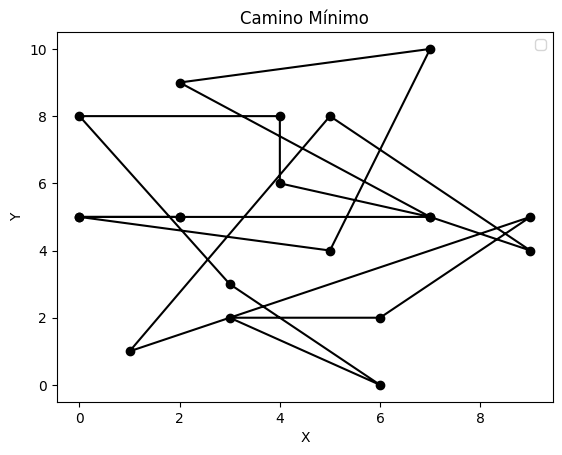

In [ ]:
plot(solucion)